importing all the required libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import seaborn as sns #for heat map
import matplotlib.pyplot as plt #heat map

reading the data

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/air_quality_health_impact_data1.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/air_quality_health_impact_data1.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


displaying the read data

In [ ]:

display(d)

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621727,1.543378,46.851415,4.521422,10,2,0,100.000000,0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,1795,20.836450,201.076193,15.533172,98.933656,69.338224,121.186513,1.662807,12.663755,8.707424,10,1,2,54.425605,2
1795,1796,42.396008,56.371077,191.945368,34.989303,83.796217,146.114663,25.238639,98.452065,17.206578,10,7,5,76.922930,1
1796,1797,358.161694,187.438620,175.798462,146.643914,95.973622,0.020249,28.646401,31.252433,6.579001,8,4,5,100.000000,0
1797,1798,36.042168,100.935106,150.936504,72.355507,60.545277,266.596729,18.472568,43.038400,3.757080,12,5,0,86.904467,0


getting the size of the dataset

In [ ]:
d.shape

(1799, 15)

to get the column headings

In [ ]:
d.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

finding missing values(if any)

In [ ]:
d.isnull()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1795,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1796,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1797,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


getting the count of missing values (if any)
for this dataset we have no (zero) missing values

In [ ]:
d.isnull().sum()

,0
RecordID,0
AQI,0
PM10,0
PM2_5,0
NO2,0
SO2,0
O3,0
Temperature,0
Humidity,0
WindSpeed,0


define the independent and dependent variables

In [ ]:
x=d[['AQI','PM2_5','NO2','SO2','O3','PM10']]
y=d['HealthImpactClass']

correlation heatmap

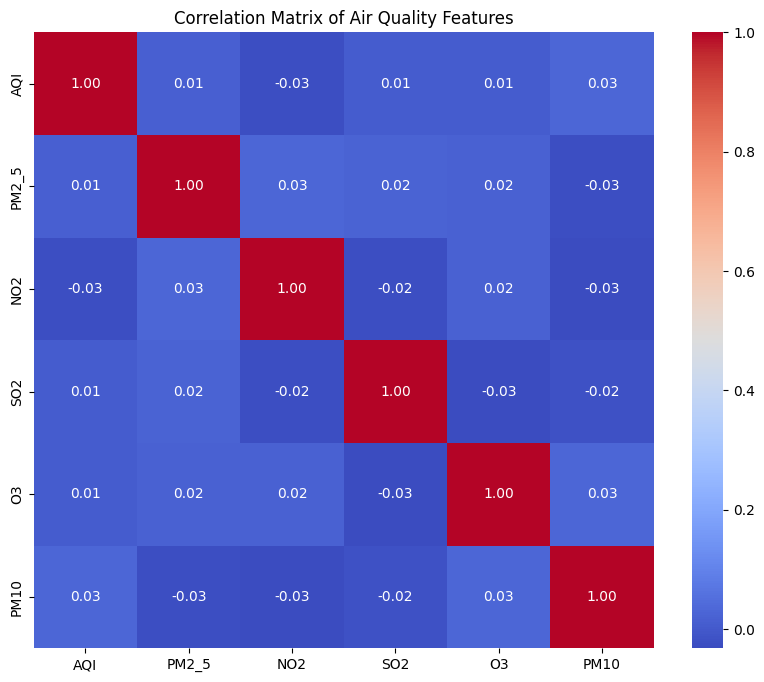

In [ ]:

features = ['AQI', 'PM2_5', 'NO2', 'SO2', 'O3', 'PM10']
correlation_data = d[features]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Features')
plt.show()

splitting the data into two parts (training:testing = 7:3)

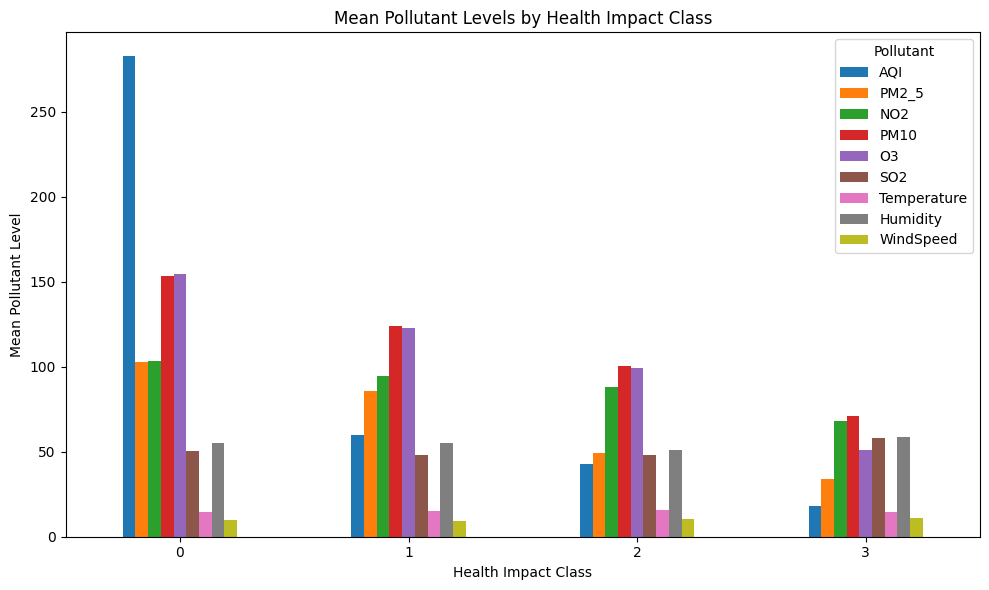

In [ ]:
selected_features = ['AQI', 'PM2_5', 'NO2','PM10','O3','SO2','Temperature','Humidity','WindSpeed']

# Group data by HealthImpactClass and calculate the mean for selected features
grouped_data = d.groupby('HealthImpactClass')[selected_features].mean()

# Create the bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Pollutant Levels by Health Impact Class')
plt.xlabel('Health Impact Class')
plt.ylabel('Mean Pollutant Level')
plt.xticks(rotation=0)
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()

In [ ]:
selected_features = ['AQI', 'PM2_5', 'NO2','PM10','O3','SO2']  # Replace with your desired features

# Group data by HealthImpactClass and calculate the mean for selected features
grouped_data = d.groupby('HealthImpactClass')[selected_features].mean()

# Create the bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Pollutant Levels by Health Impact Class')
plt.xlabel('Health Impact Class')
plt.ylabel('Mean Pollutant Level')
plt.xticks(rotation=0)
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

display the training set

In [ ]:
print("xtrain:")
print(xtrain)
print("ytrain:")
print(ytrain)

xtrain:
             AQI       PM2_5         NO2        SO2          O3        PM10
926   134.338680  128.586242   25.615702  52.217280  116.361680    1.149087
861   226.644417   12.954440  166.914391  74.744253  230.920021   73.904474
1733  213.041692  144.926267    4.317982  56.300476   87.559495   50.048911
1457  338.256693  188.897576   61.220792  99.927653   63.567047  145.457622
1664  496.079007  175.812401  121.614090  48.780299  228.444221  149.150184
...          ...         ...         ...        ...         ...         ...
905   446.335855    0.240723   76.837830  10.611346   18.545713   26.801971
1791  368.716884   28.162372   59.170233  55.707684  172.679804  174.068560
1096  110.243105  142.376417  134.502274  79.185186   77.587618  240.574186
235   361.226058   71.359251  102.889286  78.509331   19.362031   31.738956
1061  492.041735   42.084097  103.369691  21.464755   58.706752  186.000400

[1259 rows x 6 columns]
ytrain:
926     0
861     0
1733    0
1457    0
1664   

Standardization : To scale data

In [ ]:
sc_X=StandardScaler()
xtrain_scaled=sc_X.fit_transform(xtrain)
xtest_scaled=sc_X.transform(xtest)

display the scaled test data

In [ ]:
print('scaled xtrain:')
display(xtrain_scaled)

scaled xtrain:


array([[-0.78001289,  0.51137418, -1.3269265 ,  0.07097344, -0.36066803,
        -1.7069044 ],
       [-0.15207383, -1.44932037,  1.1132905 ,  0.85619154,  0.94620078,
        -0.86224666],
       [-0.24461069,  0.78844156, -1.69473641,  0.21330057, -0.68924016,
        -1.13919915],
       ...,
       [-0.94393068,  0.74520537,  0.55353584,  1.01098827, -0.80299822,
         1.07271468],
       [ 0.76346045, -0.45898732,  0.00758208,  0.98743011, -1.46722924,
        -1.3517696 ],
       [ 1.65337558, -0.9553874 ,  0.01587864, -1.00096112, -1.01838904,
         0.43913726]])

In [ ]:
print('scaled xtest:')
display(xtest_scaled)

scaled xtest:


array([[-0.41638329,  0.71078042, -0.55586937,  0.30078305, -0.42388495,
         0.24317644],
       [-0.47111808,  0.6190226 , -1.38206887, -0.01010323,  1.70196705,
        -0.47839756],
       [-1.57983685,  0.8938375 ,  0.84816736, -0.62718435, -0.87380258,
         0.74145798],
       ...,
       [ 1.65870554, -1.23686197,  0.16150702, -0.03673367, -1.48385204,
         1.40574074],
       [-0.15037073,  0.49229359, -0.23609249, -1.4246046 , -0.95454004,
        -0.43500518],
       [-0.78562212,  0.45948483, -0.18287733,  1.67482403,  0.95799281,
        -0.46702259]])

create classifier and train the model

In [ ]:
classifier=DecisionTreeClassifier()
classifier.fit(xtrain_scaled,ytrain)

DecisionTreeClassifier()

testing and evaluation of the classifier model

In [ ]:
y_pred = classifier.predict(xtest_scaled)
accuracy = accuracy_score(ytest, y_pred)

precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')

conf_matrix = confusion_matrix(ytest, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9074074074074074
Precision: 0.9072323732727129
Recall: 0.9074074074074074
F1 Score: 0.9059534689268633
Confusion Matrix:
[[457  13   0   0]
 [ 12  24   8   0]
 [  2   8   8   1]
 [  0   0   6   1]]


display the test data values and predicted values

In [ ]:
print("ytest:",ytest)
display("y_pred",y_pred)

ytest: 282     0
268     0
764     1
1015    0
1347    0
       ..
1178    0
401     0
154     0
1389    0
1144    0
Name: HealthImpactClass, Length: 540, dtype: int64


'y_pred'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 3,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,

visualization using heat map

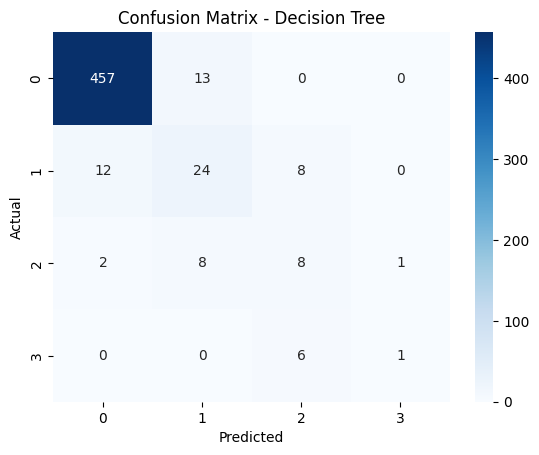

In [ ]:
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, cmap='Blues',fmt='d')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

visualization of the decision tree

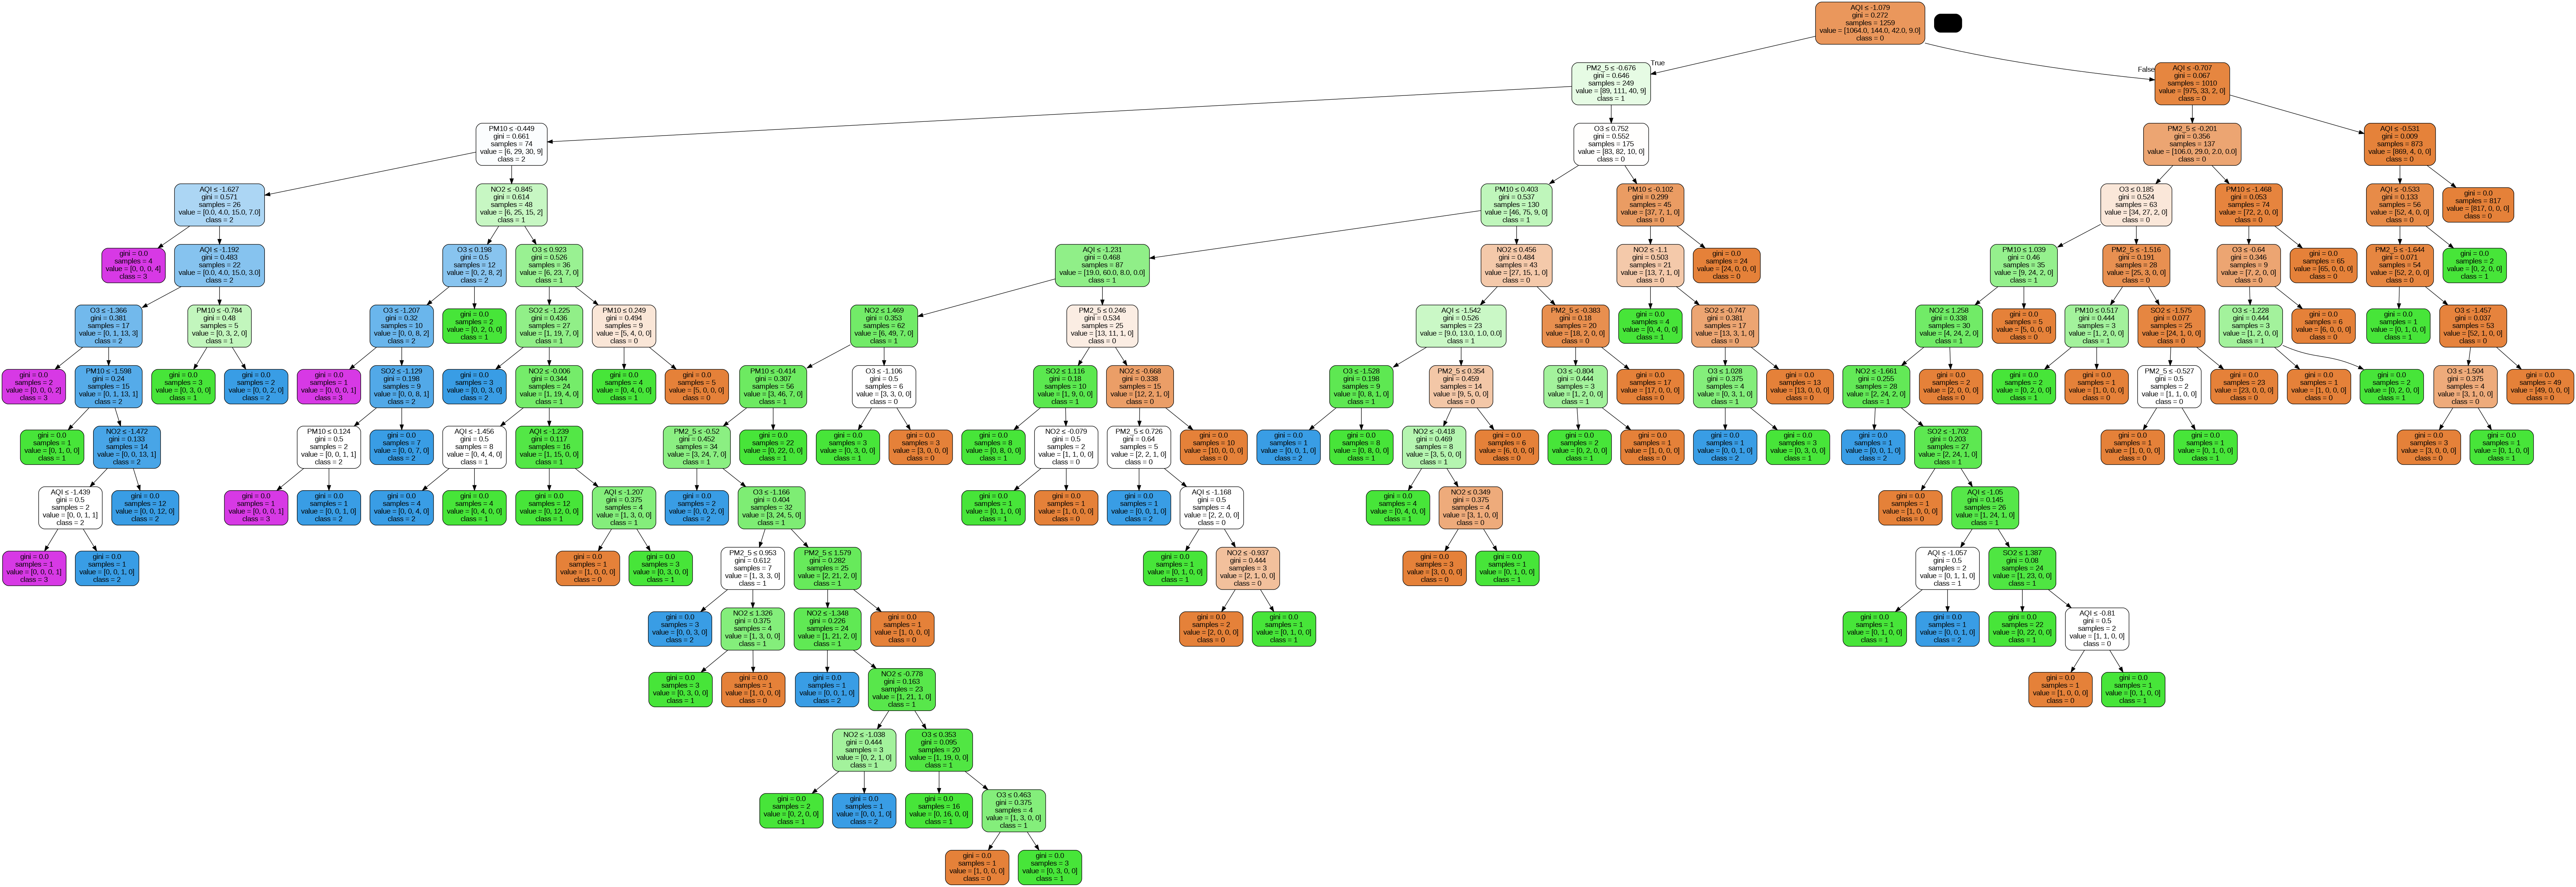

In [ ]:
feature_cols = ['AQI','PM2_5','NO2','SO2','O3','PM10']
data=StringIO()
export_graphviz(classifier,out_file=data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1','2','3'])
# Create graph from dot data using graphviz

graph=pydotplus.graph_from_dot_data(data.getvalue())
# Display the graph image
Image(graph.create_png())

testing the model for an unseen sample data

In [ ]:
sample_input = [[85.26206184,34.99936575,92.94475125,7.271121434,269.7368489,28.06782207]]
predicted_class = classifier.predict(sc_X.fit_transform([sample_input[0]]))[0]


class_map = {0:'Very High (HealthImpactScore >= 80)',1: 'High (60 <= HealthImpactScore < 80)',2: 'Moderate (40 <= HealthImpactScore < 60)',
3: 'Low (20 <= HealthImpactScore < 40)'}
print(f"Predicted Health Impact Class: {class_map.get(predicted_class, predicted_class)}")


Predicted Health Impact Class: Very High (HealthImpactScore >= 80)


pruning of the decision tree

In [ ]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=5)
classifier.fit(xtrain_scaled,ytrain)
ypred=classifier.predict(xtest_scaled)
print('accuracy score:',accuracy_score(ytest,ypred))

accuracy score: 0.9074074074074074


display the pruned tree at max_depth=5

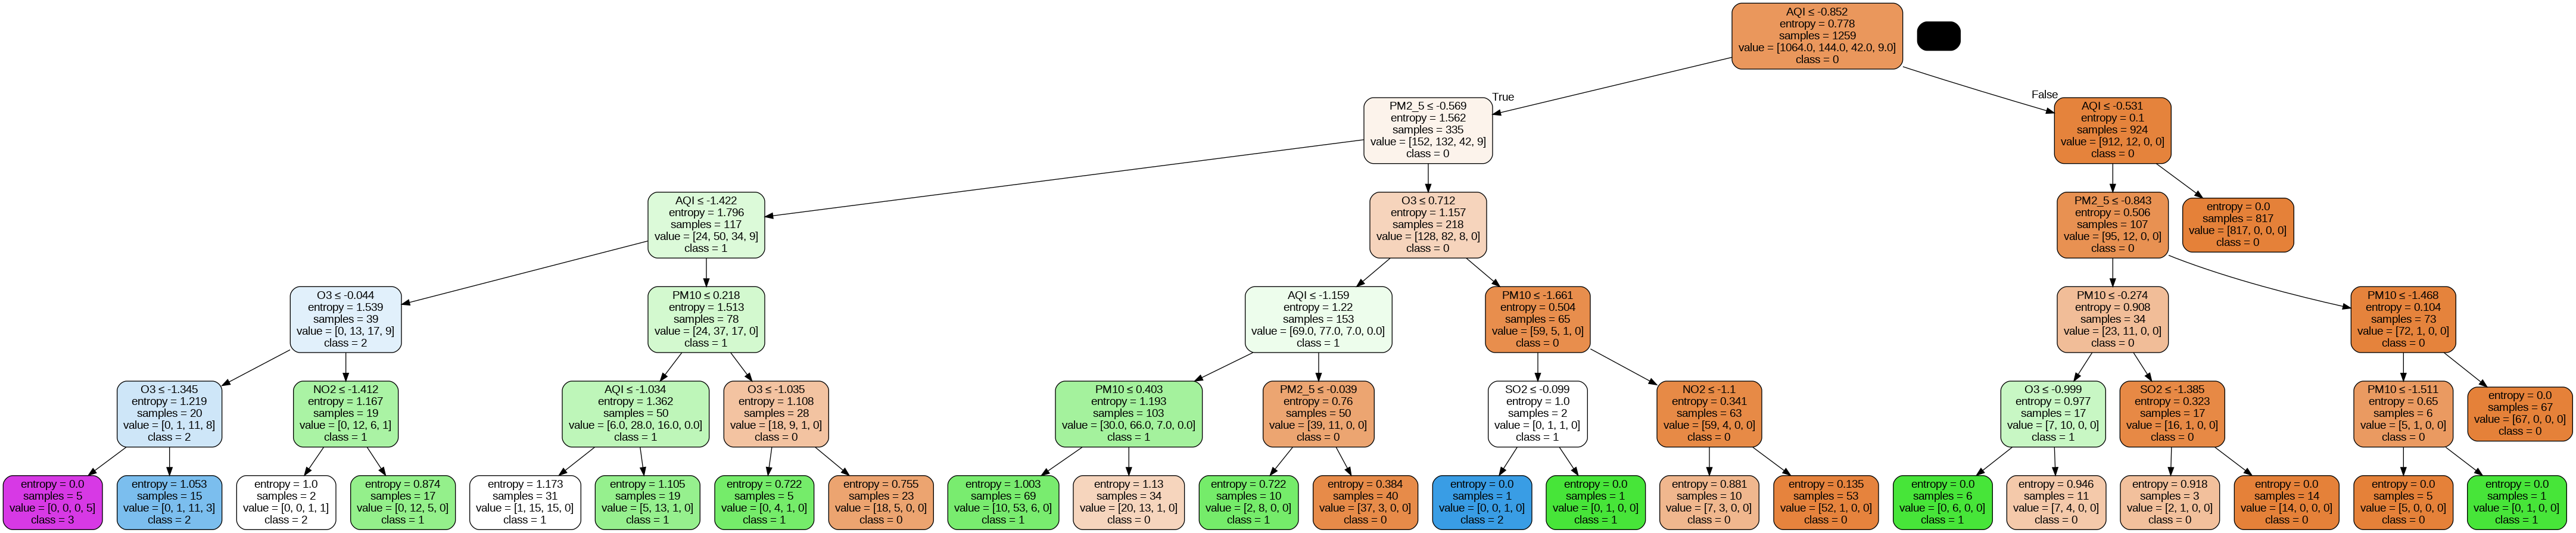

In [ ]:
feature_cols = ['AQI','PM2_5','NO2','SO2','O3','PM10']
data=StringIO()
export_graphviz(classifier,out_file=data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1','2','3'])
# Create graph from dot data using graphviz

graph=pydotplus.graph_from_dot_data(data.getvalue())
# Display the graph image
Image(graph.create_png())

In [ ]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=4)
classifier.fit(xtrain_scaled,ytrain)
ypred=classifier.predict(xtest_scaled)
print('accuracy score:',accuracy_score(ytest,ypred))

accuracy score: 0.8962962962962963


In [ ]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=3)
classifier.fit(xtrain_scaled,ytrain)
ypred=classifier.predict(xtest_scaled)
print('accuracy score:',accuracy_score(ytest,ypred))

accuracy score: 0.8555555555555555


In [ ]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=5)
classifier.fit(xtrain_scaled,ytrain)
ypred=classifier.predict(xtest_scaled)
print('accuracy score:',accuracy_score(ytest,ypred))

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=6)
classifier.fit(xtrain_scaled,ytrain)
ypred=classifier.predict(xtest_scaled)
print('accuracy score:',accuracy_score(ytest,ypred))

accuracy score: 0.8944444444444445
